# Trabalho Prático 1
## Grupo:
* Gabriel Alves Reis, 
* Gabriel Castelo Branco Rocha Alencar Pinto, 2020006523
* Samuel Brísio, 


1- Envoltória Convexa (Gift Wrapping ??)
- Implementar primitiva de posição relativa de semiretas
- Sorted (default do python) com nossa primitiva
- Algoritmo da Envoltória (Gift Wrapping)
    - (conj. de pontos) -> (conj. de pontos)
- função para visualizar a envoltória

## Introdução

Neste notebook, foi implementado um algoritmo de Aprendizado de Máquina Supervisionado, ou seja, um algoritmo que, recebendo um determinado conjunto ou uma determinada base de dados, o algoritmo é capaz de aprender as características de diferentes amostras, permitindo-o classificar amostras desconhecidas em dois grupos. Outrossim, as tarefas do algoritmo são as seguintes:

* Dado um conjunto, separar uma porcentagem das tarefas para treinamento do modelo
* Estando o modelo treinado, a porcentagem restante é utilizada para poder validar o funcionamento do modelo, verificando se a capacidade de separação das amostras é válida.
* Concluídas ambas estas etapas e validado o modelo, o mesmo estará pronto para receber amostras aleatórias daqueles dados, de modo a classificá-las com certa acurácia.

In [81]:
# Importando Módulos para Funcionamento
import matplotlib.pyplot as plt
from modules.functions import *


## Conjuntos de Teste 

Inicialmente, para teste de veracidade e funcinamento 

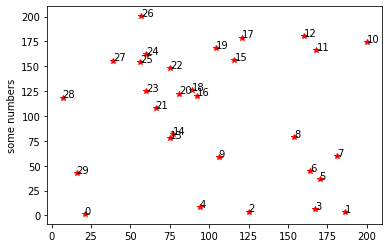

In [82]:
dot_list = []

seed(16)
for i in range(30):
    x = randint(0,200)
    y = noise(randint(0,200))
    a = Dot(x, y)
    dot_list.append(a)

x = []
y = []

for e in sortDotsByPolarAngle(dot_list):
    x.append(e.x)
    y.append(e.y)

fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')
plt.show()


# Envoltória

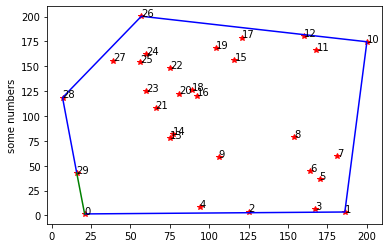

In [83]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')

x_envolt = []
y_envolt = []

sorted_list = sortDotsByPolarAngle(dot_list)

convexEnvelope = Graham(sorted_list)
for e in convexEnvelope:
    x_envolt.append(e.x)
    y_envolt.append(e.y)


ax.plot(x_envolt, y_envolt, 'b-')
ax.plot([x_envolt[len(x_envolt) - 1], x_envolt[0]], [y_envolt[len(y_envolt) - 1], y_envolt[0]], 'g-')
plt.show()

# Teste

Envoltoria 1

Perpendicular


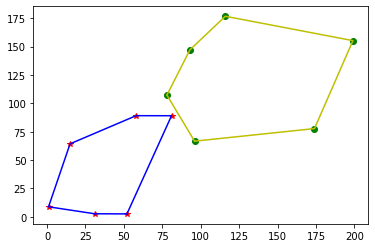

In [84]:
nPoints = 6
randomSeedA = randint(0, 1000)
randomSeedB = randint(0, 1000)
(pontosA, EnvoltoriaA) = EnvoltoriaAleatoria(seedParam=randomSeedA, numDots=nPoints)
(pontosB, EnvoltoriaB) = EnvoltoriaAleatoria(randomSeedB, nPoints, 60, 200, 60, 200)

fig, ax = plt.subplots()

plotEnvoltoria(ax, pontosA, EnvoltoriaA)
plotEnvoltoria(ax, pontosB, EnvoltoriaB, dotType='go', envType='y-')

endPointList, segmentsList = preProcessConvexHull(EnvoltoriaA= EnvoltoriaA, EnvoltoriaB= EnvoltoriaB)

if(not sweepLineIntersection(endPointList, segmentsList)):
    modlLines = ourModel(EnvoltoriaA, EnvoltoriaB)
    a, b = modlLines[1]
    ax.plot([a.x, b.x], [a.y, b.y], 'r-')
    
    c, d = modlLines[0]
    ax.plot([c.x, d.x], [c.y, d.y], 'r-')
    

    produtoEscalar = (b.x - a.x) * (d.x - c.x) + (b.y - a.y) * (d.y - c.y) 

    print("NOPE" if produtoEscalar > 10**(-8) else "Perpendicular")


plt.show()


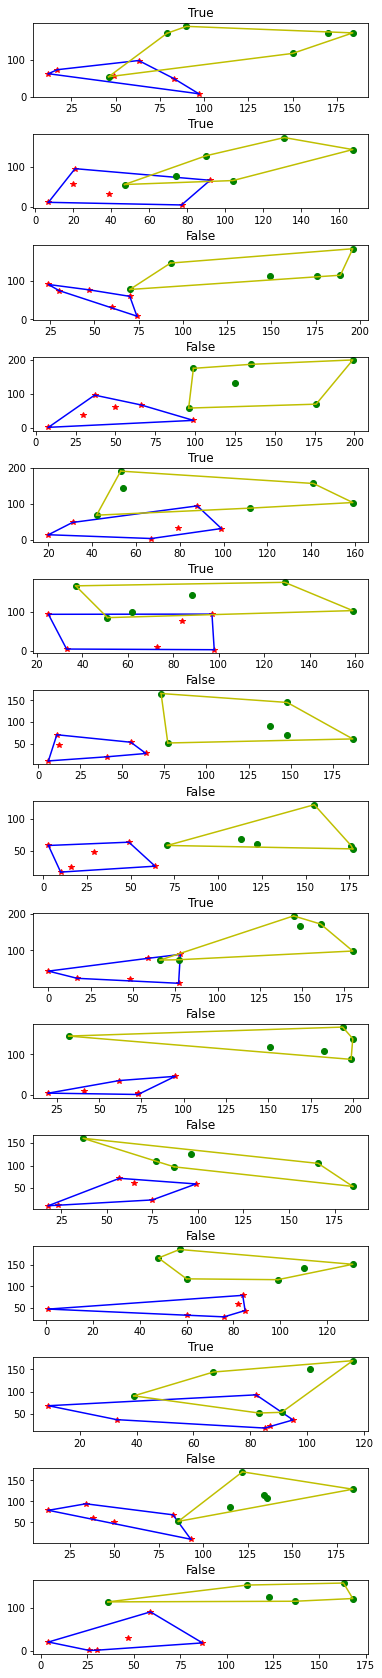

In [89]:

testTo(15)